# GraphX

In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from graphframes import *
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
spark = SparkContext("local", "sqlContext")
sql = SQLContext(spark)

#### Create Graph G(V, E)

In [3]:
# Create a Vertex DataFrame with unique ID column "id"
v = sql.createDataFrame([("a", "Alice", 34),("b", "Bob", 36),("c", "Charlie", 30),], ["id", "name", "age"])
v.show()

# Create an Edge DataFrame with "src" and "dst" columns
e = sql.createDataFrame([("a", "b", "friend"),("b", "c", "follow"),("c", "b", "follow"),], ["src", "dst", "relationship"])
e.show()

# Create a GraphFrame
G = GraphFrame(v, e)

+---+-------+---+
| id|   name|age|
+---+-------+---+
|  a|  Alice| 34|
|  b|    Bob| 36|
|  c|Charlie| 30|
+---+-------+---+

+---+---+------------+
|src|dst|relationship|
+---+---+------------+
|  a|  b|      friend|
|  b|  c|      follow|
|  c|  b|      follow|
+---+---+------------+



#### Get in-degree of each vertex

In [4]:
G.inDegrees.show()

+---+--------+
| id|inDegree|
+---+--------+
|  c|       1|
|  b|       2|
+---+--------+



#### Count the number of "follow" connections in the graph

In [5]:
G.edges.filter("relationship = 'follow'").count()

2

#### Pagerank algorithm

In [7]:
res = G.pageRank(resetProbability=0.01, maxIter=20)
res.vertices.select("id", "pagerank").show()

+---+------------------+
| id|          pagerank|
+---+------------------+
|  b|1.0905890109440908|
|  a|              0.01|
|  c|1.8994109890559092|
+---+------------------+



In [8]:
def PlotGraph(edge_list):
    Gplot=nx.Graph()
    for row in edge_list.select('src','dst').take(1000):
        Gplot.add_edge(row['src'],row['dst'])

    plt.subplot(121)
    nx.draw(Gplot, with_labels=True, font_weight='bold')

C:\Program Files\Python38\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Program Files\Python38\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


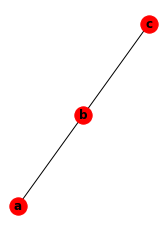

In [9]:
PlotGraph(G.edges)

## Credits & Links

https://graphframes.github.io/graphframes/docs/_site/quick-start.html